In [19]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [20]:
import tensorflow as tf
tf.__version__
from keras.preprocessing.image import ImageDataGenerator

In [21]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image up to 20 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [22]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [23]:
batch_size = 8

train_directory = 'face_images/train/'
#classes inferred from subdirectory
#categorical means the output will be one-hot encoded(all 0s and one 1, where the index of the one indicated the class)
train_data = image_gen.flow_from_directory(directory = train_directory, target_size = (256,256), class_mode = "categorical", batch_size = batch_size)

test_directory = 'face_images/test/'
test_data = image_gen.flow_from_directory(directory = test_directory, target_size = (256,256), class_mode = "categorical", batch_size = batch_size)

Found 60 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [24]:
#designing the model
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, strides = 2, activation = "relu", input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters = 64, kernel_size = 3, strides = 2, activation = "relu", input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters = 132, kernel_size = 3, strides = 2, activation = "relu", input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(4, activation = 'softmax'))


# Last layer, multi-class so we use softmax and categorical_crossentropy
#did not write

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 127, 127, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 132)         76164     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 132)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1188)             

In [25]:
train_data.class_indices

{'darda': 0, 'labenm': 1, 'noureddin': 2, 'sjcutt': 3}

Epoch 1/20
8/8 [==============================] - 2s 192ms/step - loss: 1.3348 - accuracy: 0.3167 - val_loss: 1.2801 - val_accuracy: 0.2500
Epoch 2/20
8/8 [==============================] - 1s 120ms/step - loss: 1.2416 - accuracy: 0.3333
Epoch 3/20
8/8 [==============================] - 1s 120ms/step - loss: 1.1197 - accuracy: 0.4167
Epoch 4/20
8/8 [==============================] - 1s 116ms/step - loss: 0.9327 - accuracy: 0.4500
Epoch 5/20
8/8 [==============================] - 1s 127ms/step - loss: 0.9420 - accuracy: 0.4667
Epoch 6/20
8/8 [==============================] - 1s 141ms/step - loss: 0.8057 - accuracy: 0.6000
Epoch 7/20
8/8 [==============================] - 1s 127ms/step - loss: 0.7075 - accuracy: 0.7000
Epoch 8/20
8/8 [==============================] - 1s 156ms/step - loss: 0.6014 - accuracy: 0.7833
Epoch 9/20
8/8 [==============================] - 1s 134ms/step - loss: 0.4026 - accuracy: 0.8500
Epoch 10/20
8/8 [==============================] - 1s 146ms/step - loss: 0.3

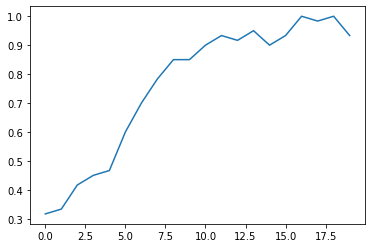

In [26]:
results = model.fit_generator(train_data,epochs=20,
                              #this is useful when you have a large number of images
                              steps_per_epoch=8,
                              validation_data=test_data,
                             validation_steps=12)

results.history

plt.plot(results.history['accuracy'])


In [27]:
#train_image_gen.class_indices
label_map = train_data.class_indices
label_map = dict(map(reversed, label_map.items()))

# 4 types of people to classify from
label_map

{0: 'darda', 1: 'labenm', 2: 'noureddin', 3: 'sjcutt'}

In [31]:
import numpy as np
from keras.preprocessing import image

test_file = 'face_images/test/noureddin/noureddin16.jpg'

test_img = image.load_img(test_file, target_size=(256, 256))

test_img = image.img_to_array(test_img)

test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

In [32]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 54ms/step - loss: 0.0850 - accuracy: 0.9500
Test loss: 0.08499674499034882
Test accuracy: 0.949999988079071


In [33]:
model.predict_classes(test_img)
prediction_prob = model.predict(test_img)
# Output prediction
print(f'Probabilities of classes for this image: {prediction_prob} ')

y_prob = model.predict(test_img) 
label_map[y_prob.argmax(axis=-1)[0]]

Probabilities of classes for this image: [[3.1506449e-03 1.2175904e-07 9.9684924e-01 4.7603284e-12]] 


'noureddin'